<a href="https://colab.research.google.com/github/duchaba/pluto_happy/blob/master/pluto_hugging_face_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/duchaba/pluto_happy/blob/main/pluto_hugging_face_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# üåª Welcome Pluto, HuggingFace, and Stable Diffusion

- NOTE: ‚úã
- I will use AI as a coding collaborator: I will keep the
  - "prompt" use to generate the code.
  - I will also give it a "grade", where A and B is
  - fully working code, C, F is failed.


1. Use Stable Diffusion (SD) and related SD models.

# üíñ Welcome back Pluto :-)

In [2]:
# git version should be 2.17.1 or higher
!git --version

git version 2.34.1


In [1]:
# prompt: None
# Note: simple git clone

# welcom back Pluto, clone Pluto.
git_repo = 'pluto_happy'
git_url = f'https://github.com/duchaba/{git_repo}.git'
!git clone {git_url}

Cloning into 'pluto_happy'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 52 (delta 24), reused 26 (delta 11), pack-reused 0
Receiving objects: 100% (52/52), 6.69 MiB | 21.56 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [3]:
# prompt: None
# Note: manual write because it is too simple

%%capture pluto_install_lib_log
fname = 'requirements.txt'
git_req = f'{git_repo}/{fname}'
!pip install -r {git_req}

In [ ]:
# %lsmagic

In [4]:
# prompt: None
# Note: start up pluto

fname = './pluto_happy/pluto.py'

%run {fname}
pluto = Pluto_Happy('Pluto likes to hug')

---------------------------------- : ----------------------------------
                  Hello from class : <class '__main__.Pluto_Happy'> Class: Pluto_Happy
                         Code name : Pluto likes to hug
                         Author is : Duc Haba
---------------------------------- : ----------------------------------


In [5]:
# prompt: None
# Note: double check on system info

pluto.print_info_self()

---------------------------------- : ----------------------------------
                       Hello, I am : Pluto likes to hug
                    I will display : Python, Jupyter, and system info.
             For complete doc type : help(pluto) ...or help(your_object_name)
                                 . : .
                               ... : ¬Ø\_(„ÉÑ)_/¬Ø
---------------------------------- : ----------------------------------
Total memory: 25.45 GB
Available memory: 24.26 GB
Memory usage: 0.03%
CPU type: Intel(R) Xeon(R) CPU @ 2.20GHz, arch: X86_64
Number of CPU cores: 4
CPU usage: 11.5%
Python version: 3.10.12.final.0 (64 bit)
---------------------------------- : ----------------------------------
GPU type: Tesla T4
GPU ready staus: True
Number of GPUs: 1
Total Memory: 15.00 GB
Free Memory: 14.75 GB
GPU allocated RAM: 0.0 GB
GPU reserved RAM 0.0 GB

---------------------------------- : ----------------------------------
                         Libraries : Imported
          

In [6]:
# prompt: None
# Note: print out pluto impressive AI documentation,
# i.e. the code documentation was created in large part by this/Colab AI.

help(pluto)

Help on Pluto_Happy in module __main__ object:

class Pluto_Happy(builtins.object)
 |  Pluto_Happy(name='Pluto', *args, **kwargs)
 |  
 |  The Pluto projects starts with fun AI hackings and become a part of my
 |  first book "Data Augmentation with Python" with Packt Publishing.
 |  
 |  In particular, Pluto_Happy is a clean and lite kernel of a simple class,
 |  and using @add_module decoractor to add in specific methods to be a new class,
 |  such as Pluto_HFace with a lot more function on HuggingFace, LLM and Transformers.
 |  
 |  Args:
 |      name (str): the display name, e.g. "Hanna the seeker"
 |  
 |  Returns:
 |      (object): the class instance.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name='Pluto', *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  decrypt_it(self, x)
 |      Decrypts the encrypted string using the stored crypto key.
 |      
 |      Args:
 |          x: (str) to be decrypted.
 |      
 |      Retu

# ü§ó HuggingFace: Set up

- Model: stabilityai/stable-diffusion-xl-base-1.0

In [6]:
%%capture install_log

# prompt: install and import gradio, transformers, diffusers, and torch
# grade: C // pip install is OK but not the impport
# install the lib
!pip install gradio
!pip install transformers
!pip install diffusers
!pip install torch
!pip install accelerate

In [8]:
# #
# import gradio
# import transformers
# import torch
# import diffusers

# print(f'gradio version 3.30.0: Actual: {gradio.__version__}')
# print(f'transformers version 4.31.0: Actual: {transformers.__version__}')
# print(f'diffusers version: {diffusers.__version__}')
# print(f'torch version: 2.0.1+cu118: Actual: {torch.__version__}')
# # print(f'accelerate version: x: Actual: {accelerate.__version__}')

gradio version 3.30.0: Actual: 3.39.0
transformers version 4.31.0: Actual: 4.31.0
diffusers version: 0.19.3
torch version: 2.0.1+cu118: Actual: 2.0.1+cu118


In [61]:
# # create pluto_huggingface.py
# pluto_huggingface='./pluto_happy/pluto_huggingface.py'
# pluto_happy= './pluto_happy/pluto.py'
# !cp {pluto_happy} {pluto_huggingface}


## Quick Check

In [62]:
# %%writefile -a {pluto_huggingface}

# prompt: use gradio to load model stabilityai/stable-diffusion-xl-base-1.0
# grade: F // Not even close to working code. It is because the "load()" function is
# introduced about a year ago (too recent?)
#
#
import gradio
import transformers
import torch
import diffusers

#
@add_method(Pluto_Happy)
def fetch_auto_load(self, model='stabilityai/stable-diffusion-xl-base-1.0'):
  """
  This function is used to load HuggingFace pretrained model and run inference.

  Args:
    model: A string param. The name of a pretrained model.
    Default is "stabilityai/stable-diffusion-xl-base-1.0"

  Returns:
    None
  """

  model= f'models/{model}'
  title='Pluto: Latest Image Generation'
  desc='This space Pluto Sandbox.'
  examples=['Flowers in Spring', 'Bird in Summer', 'beautiful woman close up on face in autumn.', 'Old man close up on face in winter.']
  arti = f'Note: The underline model is: {model}'
  gradio.load(model,
    title=title,
    description=desc,
    examples=examples,
    article=arti).launch(debug=True)
  return


Appending to ./pluto_happy/pluto_huggingface.py


In [ ]:
# # test it
# # It started OK, but could not generate an image
# pluto.fetch_auto_load()

In [ ]:
# # prompt: write python inline documentation for the following function: fetch_auto_load()

# fetch_auto_load()

# ü§ó HuggingFace: Clean Method

In [63]:
# %%writefile -a {pluto_huggingface}

# prompt: write a function using StableDiffusionXLPipeline and huggingface stabilityai/stable-diffusion-xl-base-1.0 to display text to image with documentation
# grade: F // Nothing useable after 3 tries
#
# after I wrote the function, I asked it to write the documentation
#
# prompt: write python inline documentation for the following function: fetch_image_model
# grade: A- // it does not said I stored the pipe in self.pipe

import gradio
import transformers
import torch
import diffusers

@add_method(Pluto_Happy)
def fetch_image_model(self, model):

  """
  Description:

  This function is used to load a pre-trained Stable Diffusion model.

  Args:

    model (str):
      The name of the model to load.

  Returns:

    None (the pipe is safed in self.pipe)

  """

  self.device = 'cuda'
  pipe = diffusers.StableDiffusionXLPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16")
  pipe.to(self.device)
  self.pipe = pipe
  self.model = model
  return

Appending to ./pluto_happy/pluto_huggingface.py


In [8]:
# %%writefile -a {pluto_huggingface}
# For HuggingFace but NOT for *.py

# prompt: None
# load stable diffusion model
pluto.fetch_image_model('stabilityai/stable-diffusion-xl-base-1.0')

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [64]:
# %%writefile -a {pluto_huggingface}

# prompt: write a function using torch.generator and StableDiffusionXLPipeline for image with documentation
# grade: C+ // tecnially it works with one error, but it is not what I am looking for.
# so I rewrite it.
#
# and I asked it to document my functin for me.
#
# prompt: write python inline documentation for the following function: draw_me
# grade: A // it writes good doc.

@add_method(Pluto_Happy)
def draw_me(self,
  prompt,
  negative_prompt,
  height,
  width,
  steps,
  seed,
  denoising_end,
  guidance_scale,
  prompt_2,
  negative_prompt_2
  ):

  """
  Generate image using the prompt using Stable Diffusion.

  Args:
    prompt (str): Prompt to generate image from. e.g.: "image of a cat."
    negative_prompt (str): Negative prompt to generate image from. Default: "incomplete".
    height (int): The height of the image to generate. Default: 768.
    width (int): The width of the image to generate. Default: 768.
    steps (int): Number of steps to run the diffusion model for. Default: 40.
    seed (int): Seed for the random number generator. Default: -1, any random seed

  Returns:
    PIL image.
  """

  # Initialize the diffusion model.
  # self.fetch_image_model(model=model)

  # Generate the image.
  gen = torch.Generator(device=self.device).manual_seed(seed)
  ximage = 1
  result = self.pipe(prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=steps,
    height=height,
    width=width,
    denoising_end=denoising_end,
    guidance_scale=guidance_scale,
    prompt_2=prompt_2,
    negative_prompt_2=negative_prompt_2,
    num_images_per_prompt=ximage,
    generator=gen,
    output_type="pil",
    ).images
  torch.cuda.empty_cache()
  return result[0]

Appending to ./pluto_happy/pluto_huggingface.py


In [13]:
# test it
x = pluto.draw_me(
  'A picture of a beautiful model on Hawaii beach with super realistic detail, in 4K quality, soft background focus, and vibrant colors.',
  'dirty, pornographic',
  768,
  768,
  40,
  1964,
  0.8,
  7.5,
  '',
  ''
)

  0%|          | 0/40 [00:00<?, ?it/s]

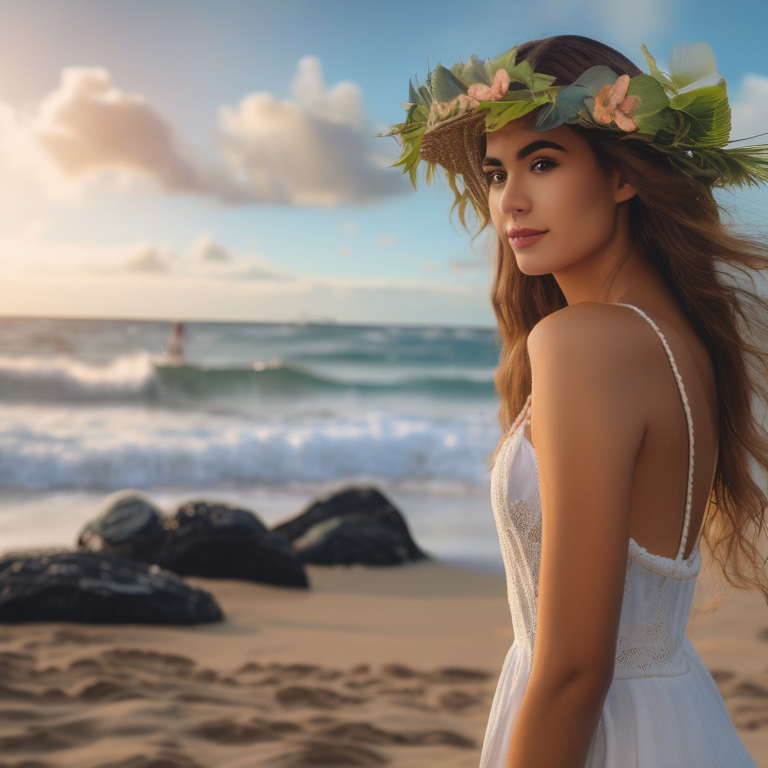

In [11]:
x

  0%|          | 0/40 [00:00<?, ?it/s]

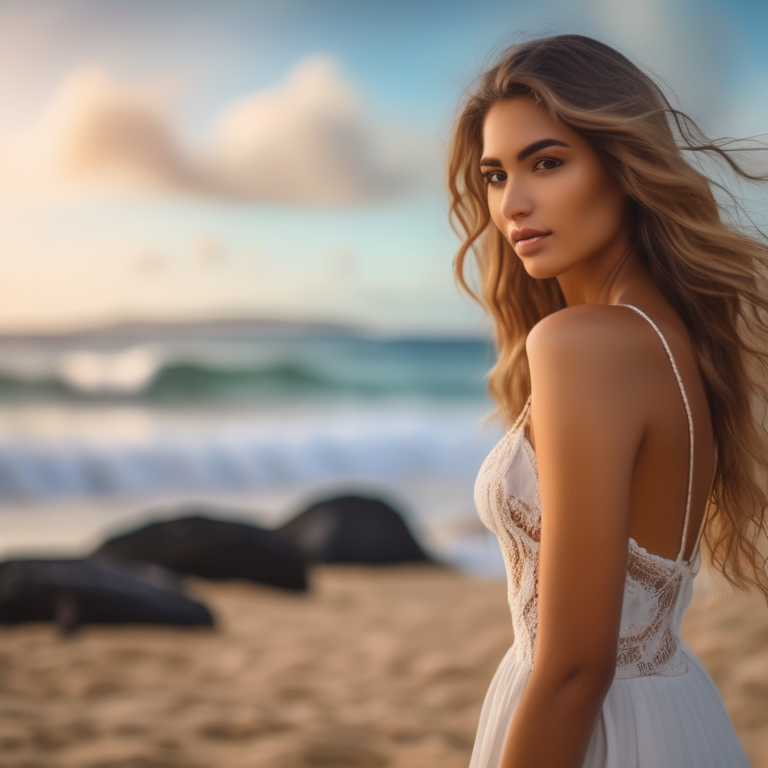

In [23]:
# test it
x = pluto.draw_me(
  'A picture of a beautiful model on Hawaii beach with super realistic detail, in 4K quality, soft background focus, and vibrant colors.',
  'dirty, pornographic',
  768,
  768,
  40,
  1964,
  0,
  8,
  '',
  'pixel noise, mishape feature'
)
x

In [65]:
# %%writefile -a {pluto_huggingface}

# prompt: write a function to define and launch the gradio interface with text for prompt and negative prompt and slider for steps, height, width, num image per prompt and a generator and output is an image
# grade: F // after a few tries with different prompt, nothing work. So I wrote it manually.
#
# prompt for doc
# prompt: write python inline documentation for the following function:
# grade: A // it writes good doc.

@add_method(Pluto_Happy)
def fetch_gradio_interface(self, predict_fn):

  """
  Description:

  This function is used to create a Gradio interface based on the `predict_fn` function.

  Args:

    predict_fn (function):
      The function that will be used to generate the image.

  Returns:

    gradio.Interface:
      The Gradio interface.

  """

  inp=[
    gradio.Textbox(label='Ask me what image do you want to draw.',
      value='A picture of a beautiful model on Hawaii beach with super realistic detail, in 4K clarity, soft background focus, and vibrant colors.'),
    gradio.Textbox(label='What do you do NOT want in the picture?', value='dirty, pornographic'),
    gradio.Slider(512, 1024, 768, step=128, label='Height'),
    gradio.Slider(512, 1024, 768, step=128, label='Width'),
    gradio.Slider(5, maximum=80, value=40, step=5, label='Number of Iterations'),
    gradio.Slider(minimum=1, step=1, maximum=1000000, randomize=True, label='Seed (Generate difference picture)'),
    gradio.Slider(0, maximum=1.0, value=1, step=0.02, label='Advance: denoising_end'),
    gradio.Slider(0.5, maximum=12.0, value=7.5, step=0.5, label='Advance: guidance_scale'),
    gradio.Textbox(label='Advance: prompt_2: for the second decoder.', value=''),
    gradio.Textbox(label='Advance: negative_prompt_2: for the second decoder.', value='pixel noise, , mishape feature')
    ]
  out=['image']
  title="Stable Diffusion XL model"
  desc='It is hacking time.'
  arti=f'This model is the {self.model}'
  inface = gradio.Interface(fn=predict_fn,
    inputs=inp,
    outputs=out,
    title=title,
    description=desc)
  return inface


Appending to ./pluto_happy/pluto_huggingface.py


- A photo of a victorian garden for quite reading with table and coffee cup, in vibrant color.

In [26]:
# %%writefile -a {pluto_huggingface}
# For HuggingFace but NOT for *.py

# do it
# pluto.fetch_image_model('stabilityai/stable-diffusion-xl-base-1.0')
inface = pluto.fetch_gradio_interface(pluto.draw_me)
inface.queue(4).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://160ea1e9d41ed51916.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
help(pluto.pipe)

Help on StableDiffusionXLPipeline in module diffusers.pipelines.stable_diffusion_xl.pipeline_stable_diffusion_xl object:

class StableDiffusionXLPipeline(diffusers.pipelines.pipeline_utils.DiffusionPipeline, diffusers.loaders.FromSingleFileMixin, diffusers.loaders.LoraLoaderMixin)
 |  StableDiffusionXLPipeline(vae: diffusers.models.autoencoder_kl.AutoencoderKL, text_encoder: transformers.models.clip.modeling_clip.CLIPTextModel, text_encoder_2: transformers.models.clip.modeling_clip.CLIPTextModelWithProjection, tokenizer: transformers.models.clip.tokenization_clip.CLIPTokenizer, tokenizer_2: transformers.models.clip.tokenization_clip.CLIPTokenizer, unet: diffusers.models.unet_2d_condition.UNet2DConditionModel, scheduler: diffusers.schedulers.scheduling_utils.KarrasDiffusionSchedulers, force_zeros_for_empty_prompt: bool = True, add_watermarker: Optional[bool] = None)
 |  
 |  Pipeline for text-to-image generation using Stable Diffusion XL.
 |  
 |  This model inherits from [`DiffusionPip

In [ ]:
help(gradio.Interface)

Help on class Interface in module gradio.interface:

class Interface(gradio.blocks.Blocks)
 |  Interface(fn: 'Callable', inputs: 'str | IOComponent | list[str | IOComponent] | None', outputs: 'str | IOComponent | list[str | IOComponent] | None', examples: 'list[Any] | list[list[Any]] | str | None' = None, cache_examples: 'bool | None' = None, examples_per_page: 'int' = 10, live: 'bool' = False, interpretation: 'Callable | str | None' = None, num_shap: 'float' = 2.0, title: 'str | None' = None, description: 'str | None' = None, article: 'str | None' = None, thumbnail: 'str | None' = None, theme: 'Theme | str | None' = None, css: 'str | None' = None, allow_flagging: 'str | None' = None, flagging_options: 'list[str] | list[tuple[str, str]] | None' = None, flagging_dir: 'str' = 'flagged', flagging_callback: 'FlaggingCallback' = <gradio.flagging.CSVLogger object at 0x7f53958f4a30>, analytics_enabled: 'bool | None' = None, batch: 'bool' = False, max_batch_size: 'int' = 4, _api_mode: 'bool' =

# üíÉ Dance time

In [66]:
# %%writefile -a {pluto_huggingface}

# prompt: write the function from the above print dancer with documentation
# Note: 100% correct, but I did ask it write a function for printing a dancer is ascii art, but it could not do it.
# Note 2: I have to write the code with the comment "# print dancer" first.

@add_method(Pluto_Happy)
def dance_it(self):

  """
  This function prints a dancer

  Args:
    None

  Returns:
    None, just a print out
  """

  print('|-----------------------------------------------------------------------|')
  print('|    o   \ o /  _ o         __|    \ /     |__        o _  \ o /   o    |')
  print('|   /|\    |     /\   ___\o   \o    |    o/    o/__   /\     |    /|\   |')
  print('|   / \   / \   | \  /)  |    ( \  /o\  / )    |  (\  / |   / \   / \   |')
  print('|----------------------------Yahoo_ooo----------------------------------|')
  return
#

Appending to ./pluto_happy/pluto_huggingface.py


In [28]:
# test it
pluto.dance_it()

|-----------------------------------------------------------------------|
|    o   \ o /  _ o         __|    \ /     |__        o _  \ o /   o    |
|   /|\    |     /\   ___\o   \o    |    o/    o/__   /\     |    /|\   |
|   / \   / \   | \  /)  |    ( \  /o\  / )    |  (\  / |   / \   / \   |
|----------------------------Yahoo_ooo----------------------------------|


# üç™ Milk and Cookies or Tea Time

In [67]:
# %%writefile -a {pluto_huggingface}

# prompt: define a function for print ascii art for the word happy
# Note: Failed. it could not do it. so I use https://patorjk.com with efti wall

@add_method(Pluto_Happy)
def print_monkey(self):
  """
  This function prints the ascii art for the word "happy".

  Args:
    None

  Returns:
    None
  """

  print("""
0----Monkey_See-------------.-----------------..----------------.--Monkey_Do---0
|                >     <    |                 ||                |    ._____.   |
0    ***         |.===.|    !=ooO=========Ooo=!!=ooO========Ooo=!    | -_- |   0
|   (o o)        {}o o{}       \\\\  (o o)  //      \\\\  (o o) //       ([o o])   |
ooO--(_)--Ooo-ooO--(_)--Ooo---------(_)----------------(_)--------ooO--(_)---Ooo
  """)
  return

Appending to ./pluto_happy/pluto_huggingface.py


In [60]:
# test it
pluto.print_monkey()


0----Monkey_See-------------.-----------------..----------------.--Monkey_Do---0
|                >     <    |                 ||                |    ._____.   |
0    ***         |.===.|    !=ooO=========Ooo=!!=ooO========Ooo=!    | -_- |   0
|   (o o)        {}o o{}       \\  (o o)  //      \\  (o o) //       ([o o])   |
ooO--(_)--Ooo-ooO--(_)--Ooo---------(_)----------------(_)--------ooO--(_)---Ooo
  


In [ ]:
print('End of Notebook')

End of Notebook


# üöö Push to Highub

In [ ]:
# STEP 1:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# define file names
# STEP 2:
orig_file = 'pluto_foxy_fastai_on_colab_ai_v2.ipynb'
orig_path = '/content/pluto_happy/'
this_file = f'/content/drive/MyDrive/"Colab Notebooks"/{orig_file}'
#
# Pick one below
#
local_file = f'{orig_path}{orig_file}'
# local_file = f'{orig_path}data_augmentation_with_python_chapter_2_with_output.ipynb'

In [ ]:
# # STEP 3: copy local drive to google drive (this file)
# # override so need to reload this page
# #
# !cp -f {local_file} {this_file}

In [ ]:
# # STEP 4: copy (this file) to local drive for sync with github.
# # besure to save the latest first
# #
# !cp -f {this_file} {local_file}

In [68]:
# STEP 5:
import os
fdir = 'pluto_happy'
os.chdir(fdir)
!git pull
!git add -A
!git config --global user.email "duc.haba@gmail.com"
!git config --global user.name "duchaba"
!git commit -m "update again in requirement and *.py for pluto_huggingface"
!git push
#
# STEP 6:
#do the git push in the xterm console
#!git push

Already up to date.
[master 5653a06] update again in requirement and *.py for pluto_huggingface
 1 file changed, 38 insertions(+), 8 deletions(-)
fatal: could not read Username for 'https://github.com': No such device or address


# üôâ Evaluate Colab AI (Google Codey)

In [ ]:
# # new requirement
# !cp ./pluto_happy/requirements.txt ./pluto_happy/requirements_huggingface.txt


In [ ]:
!pip install wordcloud

In [ ]:
# Create a dataframe with two columns: words and counts.
df = pandas.DataFrame({"words": ["hello", "world", "good", "morning", "bye", "see", "you", "later", "how", "are", "you", "yes", "no", "who", "are", "you", "?"]})

# Display the dataframe.
df.head()

words
0    hello
1    world
2     good
3  morning
4      bye

In [ ]:
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

# # Create a word cloud using the data from the specified column.
# word_cloud = WordCloud(width=500, height=500, max_words=100).generate(df["words"].values)

In [ ]:
def word_cloud_graph(dataframe, column_name):

  """
  This function displays a word cloud graph with data from a Pandas dataframe.

  Parameters:
    dataframe: The Pandas dataframe containing the data.
    column_name: The name of the column to use for the word cloud.

  Returns:
    None
  """

  # Create a word cloud using the data from the specified column.
  # word_cloud = WordCloud(width=500, height=500, max_words=100).generate(dataframe[column_name].values)
  word_cloud = WordCloud(width=500, height=500, max_words=100).generate(df[column_name].to_string())

  # Save the word cloud to a file.
  word_cloud.to_file("word_cloud.png")

  # Display the word cloud.
  plt.imshow(word_cloud)
  plt.axis("off")
  plt.show()

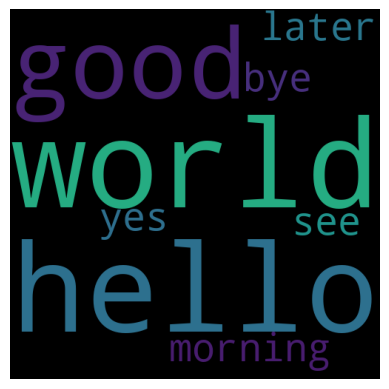

In [ ]:
word_cloud_graph(df, "words")